Model Silhouette Scores: {'K-Means': 0.6022759587511283, 'DBSCAN': 0.7950875112400636, 'Agglomerative': 0.5876722468111747}


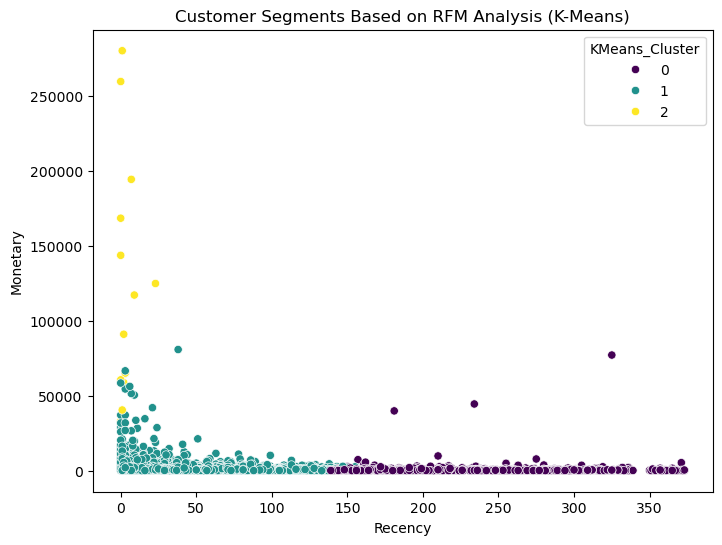

Customer Segmentation Completed and Saved!


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from datetime import datetime

# Load dataset
df = pd.read_csv("OnlineRetail.csv")

# Remove null values
df.dropna(inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Convert InvoiceDate to datetime with specified format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d-%m-%Y %H:%M")

# Remove cancelled transactions (where InvoiceNo starts with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Create TotalPrice feature
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Remove negative quantities and unit prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


# Compute Recency, Frequency, and Monetary (RFM) per CustomerID
latest_date = df['InvoiceDate'].max()
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalPrice': 'sum'  # Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

# Scale RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
rfm['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)
kmeans_score = silhouette_score(rfm_scaled, kmeans.labels_)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
rfm['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)
dbscan_score = silhouette_score(rfm_scaled, dbscan.labels_, metric='euclidean')

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
rfm['Agglo_Cluster'] = agglo.fit_predict(rfm_scaled)
agglo_score = silhouette_score(rfm_scaled, agglo.labels_)

# Compare models
model_scores = {"K-Means": kmeans_score, "DBSCAN": dbscan_score, "Agglomerative": agglo_score}
print("Model Silhouette Scores:", model_scores)

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='KMeans_Cluster', palette='viridis')
plt.title("Customer Segments Based on RFM Analysis (K-Means)")
plt.show()

# Save clustered dataset
rfm.to_csv("customer_segments.csv", index=True)
print("Customer Segmentation Completed and Saved!")

In [ ]:
##in the dataset after seeing the DBSCAN HAS ONLY NEGETIVE AND ZERO VALUES SO IT IS KMEANS WE WILL SELECT.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   TotalPrice   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB
